# NORMALLİK TESTLERİ

In [5]:
import pandas as pd
from scipy.stats import shapiro

In [8]:
veri = pd.read_excel("data-6.xlsx")
veri.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel AndrÃ©s Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,1991-04-06 00:00:00,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


Shapiro Wilk Normallik Testi

In [13]:
shapiro(veri.potential)

ShapiroResult(statistic=0.9931379556655884, pvalue=3.656581666510786e-28)

p=3.65>0.05 olduğunda veri seti içinde bulunan potential değeri normal dağılım gösterir. Bu durumda ho hipotezi kabul edilir. 
ho: değişken normal dağılıma uygundur
h1: değişken normal dağılıma uygun değildir

In [11]:
import pandas as pd
from scipy.stats import normaltest

In [12]:
normaltest(veri.potential) #3.65 0.05 den büyük olduğu için h0 hipotezi kabul edilir

NormaltestResult(statistic=203.67925228749868, pvalue=5.91033811819916e-45)

Adderson Normallik Testi

In [22]:
import pandas as pd
from scipy.stats import anderson

In [23]:
result=anderson(veri.potential)

In [24]:
result

AndersonResult(statistic=43.65317274278641, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=71.43093461067171, scale=6.131339100237638)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Aykırı Değer

In [1]:
import pandas as pd
import scipy.stats as plt
import numpy as np
import seaborn as sns

<Axes: >

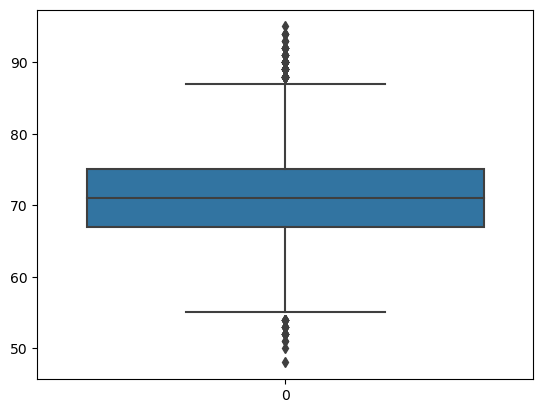

In [26]:
sns.boxplot(veri["potential"]) #aykırı değer testinde kullanılan genel geçer grafik -> Boxplot=kutu grafiği

In [28]:
print(np.where(veri["potential"]>89))

(array([    0,     2,     4,     5,     6,    11,    12,    13,    14,
          15,    16,    28,    31,    32,    35,    37,    44,    58,
          72,    77,   122,   191,   500, 14644, 17413, 17423, 17555,
       17715, 17836, 17837, 17838, 17839, 17895, 17896, 17897, 17899,
       17909, 17912, 17914, 17915, 17917, 17918, 17929, 17930, 17931,
       17932, 17933, 17934, 17935, 17936, 17937, 17938, 17939, 17940,
       17941, 17942, 17943, 17944], dtype=int64),)


Dağılım Grafiği

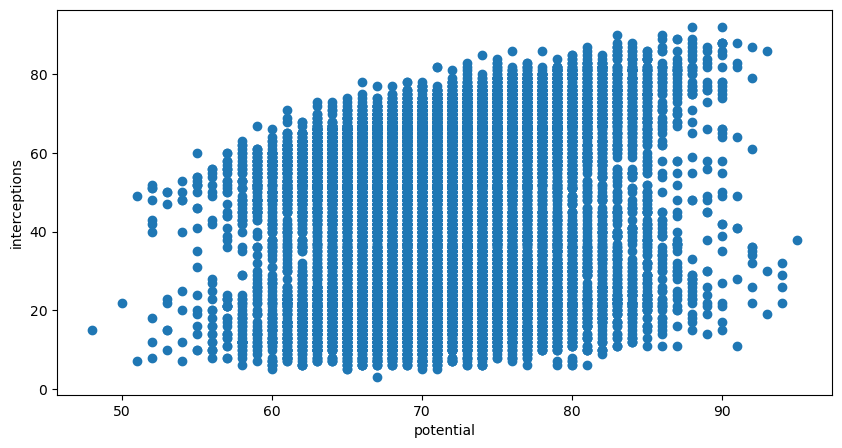

In [31]:
import scipy.stats
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(10,5))
ax.scatter(veri["potential"], veri["interceptions"])
ax.set_xlabel("potential")
ax.set_ylabel("interceptions")
plt.show()

In [33]:
import numpy as np

print(np.where((veri ["interceptions"]>80) & (veri["potential"]>90)))

(array([    4,    16, 17909, 17917, 17939], dtype=int64),)


Student Güç Analizi
Normal Dağılım gösteren iki örneklemden gelen ortamaları karşılaştırmak için kullanılır

In [34]:
from statsmodels.stats.power import TTestIndPower

In [35]:
effect=0.8
alpha=0.05
power=0.8

analysis=TTestIndPower()
result=analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha) #alpha 0.05 değeridir
print("sample size:%.3f" %result)

sample size:25.525


In [37]:
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower 

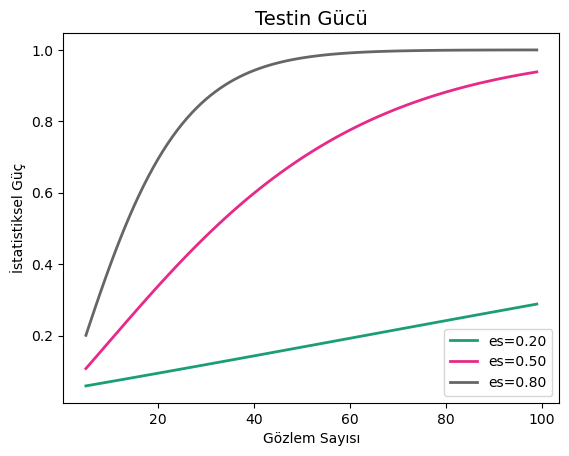

In [39]:
EtkiBüyük=array([0.2, 0.5, 0.8])
ÖrnekBüyük=array(range(5, 100))
analysis=TTestIndPower()
analysis.plot_power(dep_var="nobs", nobs=ÖrnekBüyük, effect_size=EtkiBüyük)
pyplot.title("Testin Gücü", fontsize=14)
pyplot.xlabel("Gözlem Sayısı") #bağımsız değişkenler
pyplot.ylabel("İstatistiksel Güç") 
pyplot.show()